In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255
x_test = x_test/255


In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


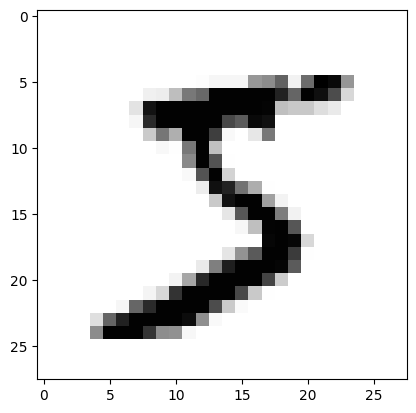

In [4]:
plt.imshow(x_train[0], cmap='Greys')

In [5]:
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model_lr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
y_onehot_train = tf.one_hot(y_train, 10)
model_lr.fit(x_train, y_onehot_train)



1875/1875 [==============================] - 2s 757us/step - loss: 0.4679 - accuracy: 0.8761


In [7]:
model_lr = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

model_lr.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_lr.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#model_lr.fit(x_train, y_train)

In [9]:
#model_lr.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2)
history_lr = model_lr.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False,)


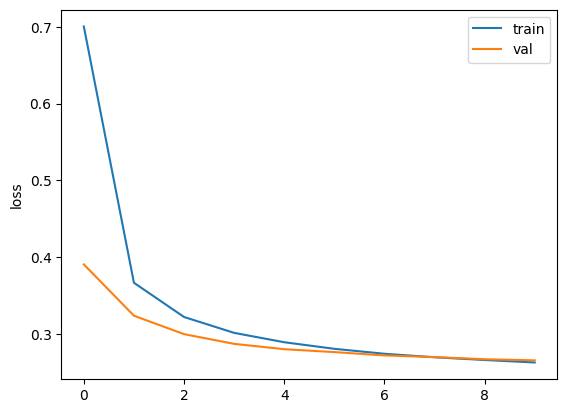

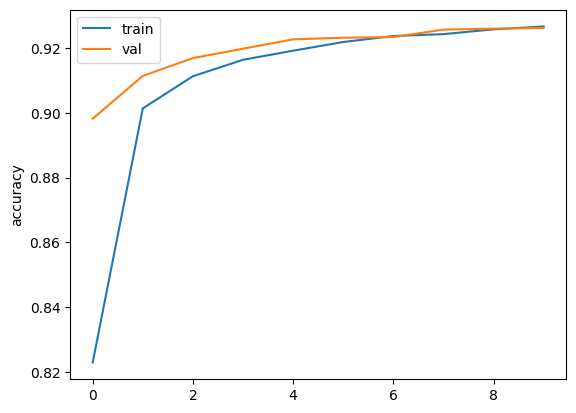

In [11]:
plt.plot(history_lr.history['loss'], label='train')
plt.plot(history_lr.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_lr.history['accuracy'], label='train')
plt.plot(history_lr.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [12]:
model_lr.evaluate(x_test, y_test,)

313/313 [==============================] - 0s 833us/step - loss: 0.2654 - accuracy: 0.9262


[0.2653653621673584, 0.9261999726295471]

1/1 [==============================] - 0s 16ms/step
[9.9070839e-06 3.3213315e-10 2.8928520e-05 5.4679480e-03 8.1475986e-07
 3.7677550e-05 3.5120908e-09 9.9395680e-01 3.3042637e-05 4.6485759e-04]  =>  7


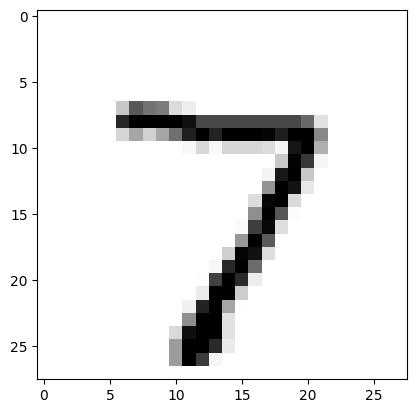

[3.5945603e-04 7.3657307e-06 9.8856634e-01 6.9623912e-04 6.3158501e-13
 5.0082626e-03 5.1486241e-03 5.3749911e-15 2.1374748e-04 1.5580006e-11]  =>  2


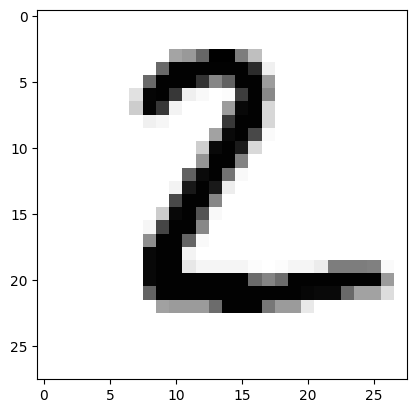

[8.6006849e-06 9.7556233e-01 1.2994186e-02 3.0233257e-03 1.6324761e-04
 8.9419511e-04 1.3783965e-03 1.7790487e-03 3.8928394e-03 3.0393500e-04]  =>  1


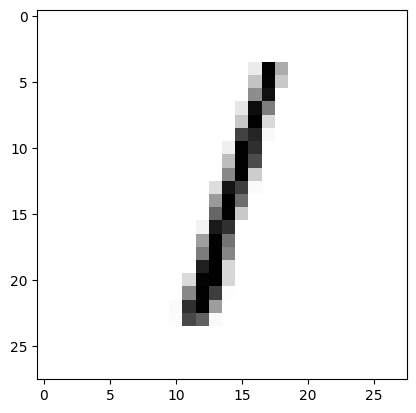

[9.9958664e-01 7.0628989e-11 9.9842124e-05 5.4553534e-06 3.5692388e-08
 1.3597176e-04 1.1442384e-04 1.7527058e-05 2.9021185e-05 1.1134198e-05]  =>  0


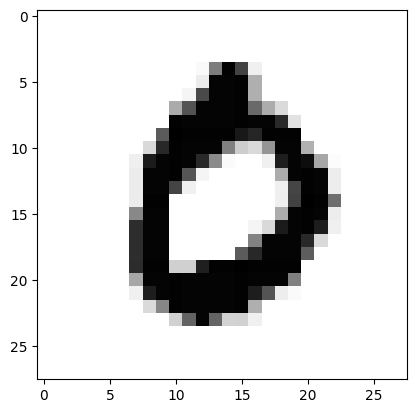

[4.0177425e-04 1.0333571e-06 2.1871864e-03 5.3967509e-05 9.6168786e-01
 1.8555588e-04 2.0461781e-03 2.3063717e-03 4.5708274e-03 2.6559211e-02]  =>  4


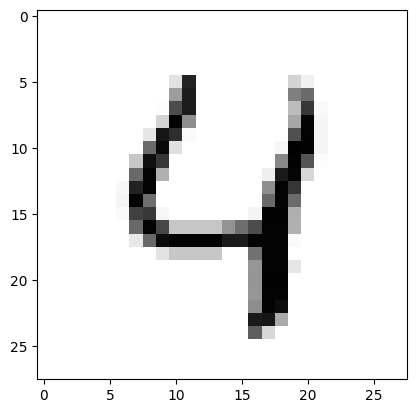

In [16]:
probs = model_lr.predict(x_test[:5])
preds = np.argmax(probs, axis=1)
for i in range(5):
    print(probs[i], " => ", preds[i])
    plt.imshow(x_test[i], cmap='Greys')
    plt.show()

In [25]:
model_lr.predict(x_test[18:19].reshape(1, 28, 28)),


1/1 [==============================] - 0s 16ms/step


(array([[1.53080371e-04, 2.63131624e-05, 1.01175904e-01, 7.55817354e-01,
         2.01091621e-04, 7.33530819e-02, 1.50132934e-02, 3.73221519e-05,
         5.42143770e-02, 8.25170173e-06]], dtype=float32),)

In [27]:
model_mlp = tf.keras.models.Sequential([
    layers.Input(x_train.shape[1:]),
    layers.Flatten(),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(10, activation='softmax')
])

model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
history_mlp = model_mlp.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=False,)

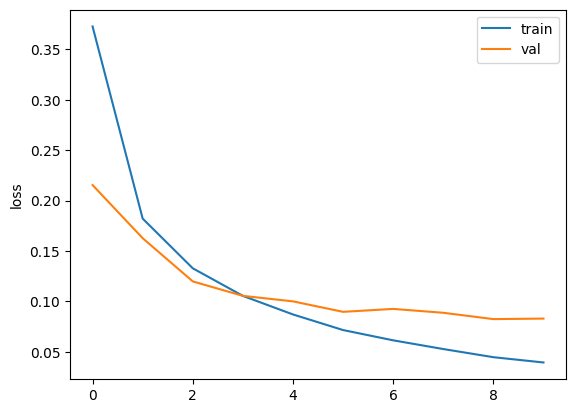

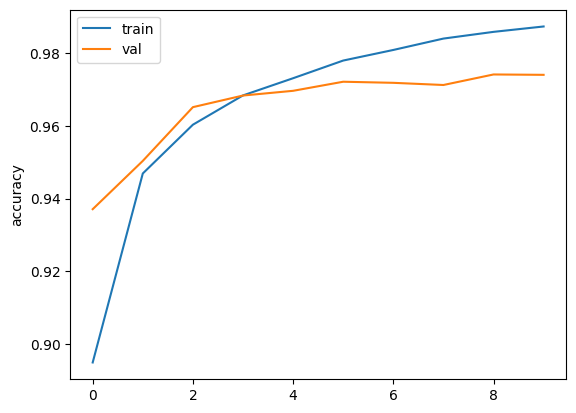

In [31]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.legend()
plt.show()